# Practical: Dimensionality Reduction

Herman Kamper, 2020-2021. Licensed under [CC BY-SA 4.0](http://creativecommons.org/licenses/by-sa/4.0/).

## Preliminaries

In [6]:
%matplotlib inline
from scipy.spatial import distance
from sklearn import datasets, decomposition, manifold
import matplotlib.pyplot as plt
import numpy as np

## Data

The [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) is arguably one of the most famous datasets in machine learning. It consists of $70\,000$ handwritten digits, each a $28 \times 28$ grayscale images. It has often been used in the past for benchmarking image classification algorithms, and is still used in studies of new algorithms.

Here we will reduce the dimensionality of the images using principle component analysis (PCA). We will also try to visualise the images in a 2-dimensional space.

The code below uses scikit-learn to load the MNIST data (this step might take a bit of time). We will only use the first 1000 images.

In [7]:
# Load data
X, y = datasets.fetch_openml("mnist_784", version=1, return_X_y=True)
X = X[:1000, :]
y = y[:1000]

(-0.5, 27.5, 27.5, -0.5)

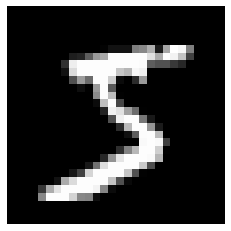

In [9]:
# Plot example
plt.imshow(X[0, :].reshape(28, 28), cmap="gray")
plt.axis("off")

## 1. Dimensionality reduction using PCA

The goal in this section is to reduce each $28 \times 28 = 784$ dimensional image vectors to a vector of $M$ dimensions, where $M < 784$.

**Question:** Complete the code below to perform PCA.

In [10]:
# Answer: Complete the code

M = 100  # target number of dimensions

# Normalise the data to be zero-mean
# Answer: Add your own code here

# Calculate the sample covariance matrix
# Answer: Add your own code here

# Calculate the eigenvalues and -vectors
# Answer: Add your own code here
# Hint: np.linalg.eig

# Find the M eigen vectors corresponding to the largest eigen values
# Answer: Add your own code here

# Project the data to the lower-dimensional space
X_projected = # Answer: Add your own code here

In [11]:

# Answer: Add code and new cells here


To visualise the effect of the dimensionality reduction, we can project the reduced data back to the original feature space, and then plot the image. You can do this by (un)commenting the appropriate lines below.

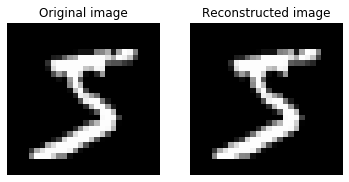

In [12]:
# Reconstruction
X_reconstructed = X                                            # comment out this line
# X_reconstructed = np.dot(X_projected, W.T) + X.mean(axis=0)  # uncomment

# Plot the original and the reconstructed image
i_data = 0
plt.subplot(1, 2, 1)
plt.imshow(X[i_data, :].reshape(28, 28), cmap="gray")
plt.title("Original image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Reconstructed image")
plt.imshow(X_reconstructed[i_data, :].reshape(28, 28), cmap="gray")
plt.axis("off")
plt.savefig("fig/question1.1.pdf")

**Questions:**
- Repeat the above with different values of $M$ apart from $M = 100$. What is the effect on the reconstructions?
- In the step where we calculate the eigenvalues and -vectors, one option would be to use `np.linalg.eig`. An alternative would be to use the SVD by calling `np.linalg.svd`. If you followed the first option, try to get the same result with the other (or vice-versa).
- Use the Jupyter notebook `%timeit` magic command to compare the above two ways of finding the projection vectors. Which one is faster?

**Question:** Plot all the eigenvalues, calculated in the first cell in Section 3.1, from large to small. What does this plot tell you? Can it help you pick an appropriate $M$?

In [13]:

# Answer: Add code and new cells here


Scikit-learn also has a `PCA` class in `sklearn.decomposition`, which you can use from this point onwards. Here is an example of how it can be used:

In [14]:
# PCA in scikit-learn
M = 10
model = decomposition.PCA(n_components=M)
model.fit(X)
X_projected = model.transform(X)

## 2. Visualising data with PCA and t-SNE

Each MNIST image consists of a 784-dimensional vector. It is not possible for us to visuallise data in such high dimensions. This is often the case in many machine learning and data analysis problems. To explore data, it is useful to map it to a 2- or 3-dimensional space which we can visualise. Here we will use PCA and t-SNE to do so. Different visualisation methods rely on different assumptions, and it is useful to therefore apply more than one approach when visualising a particular dataset.

**Question:** Using scikit-learn, use PCA to visualise the 1000 digit images in 2-dimensions. Concretely, create a 2-dimensional scatter plot where each item is coloured according to its class.

In [15]:

# Answer: Add code and new cells here


**Question:** Repeat the above question, but now use t-SNE. You can use the `TSNE` class in `sklearn.manifold`.

In [16]:

# Answer: Add code and new cells here


## Acknowledgements

- Section 2 is taken partly from the [SciPy Lecture Notes](https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_digits_simple_classif.html).

## Hand in your completed notebook on SUNLearn

You need to hand in your completed Jupyter notebook as a PDF on SUNLearn. To export the notebook to a PDF, you can:

- Print the notebook from your browser and then choose `Save as PDF`.
- If you are doing the practical on a machine with LaTeX, you can also select `File`$\rightarrow$ `Download as` $\rightarrow$ `PDF via LaTeX (.pdf)` directly in the notebook.

Upload the PDF on SUNLearn by following the submission steps there. You may submit your work multiple times; only the last submission will be marked. **No late submissions will be accepted.**